In [2]:

import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, MeanShift, estimate_bandwidth, SpectralClustering
from sklearn.cluster import AgglomerativeClustering, OPTICS, cluster_optics_dbscan, Birch, MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.mixture import GaussianMixture

import os

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/diabetes/diabetes.csv


In [3]:
df=pd.read_csv('/kaggle/input/diabetes/diabetes.csv')
df.shape

(768, 9)

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


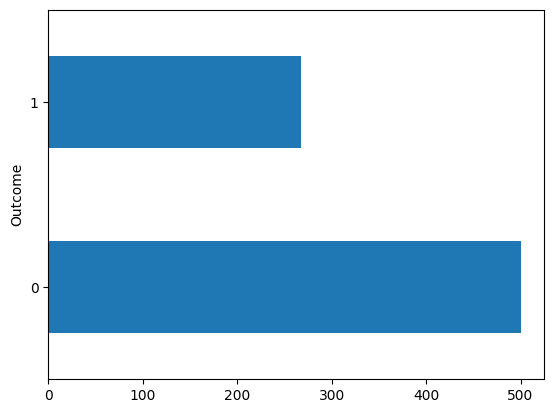

In [5]:
df.groupby('Outcome').size().plot.barh()
plt.show()

[Text(0, 0, '500'), Text(0, 0, '268')]

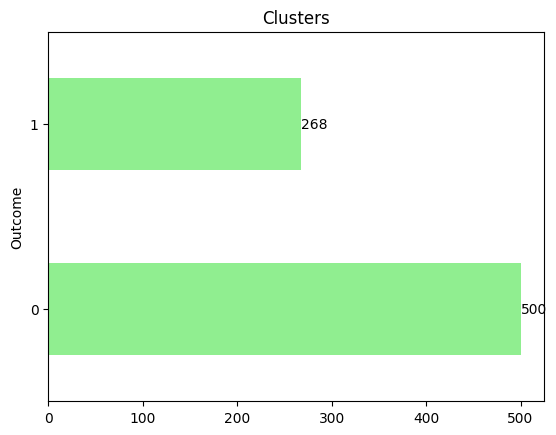

In [6]:
xf = df.groupby('Outcome')['Outcome'].count().plot(kind='barh', color='lightgreen',title='Clusters',legend=False)
xf.bar_label(xf.containers[0], label_type='edge')

In [7]:
X = df.copy()
X = X.drop('Outcome', axis=1)
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [8]:
# Normalize X

mms = MinMaxScaler()
mms.fit(X)
Xnorm = mms.transform(X)
Xnorm.shape

(768, 8)

In [9]:
# Not knowing the number of clusters (3) we try a range such 1,10
# For the ELBOW method check with and without init='k-means++'

Sum_of_squared_distances = []
for k in range(1,10):
    km = KMeans(n_clusters=k, init='k-means++')
    km = km.fit(Xnorm)
    Sum_of_squared_distances.append(km.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

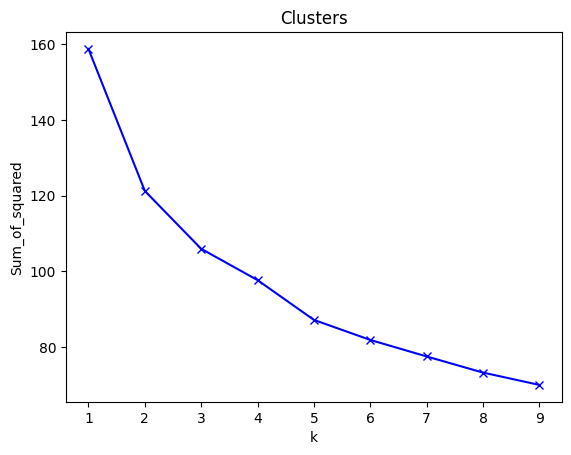

In [10]:
plt.plot(range(1,10), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared')
plt.title('Clusters')
plt.show()

In [11]:
# Knowing from the ELBOW method that k=3 ...

kmeans3 = KMeans(n_clusters=3, init='k-means++').fit(Xnorm) 

KM_clustered = Xnorm.copy()
KM_clustered = pd.DataFrame(KM_clustered)
KM_clustered.loc[:,'Cluster'] = kmeans3.labels_ # append labels to points

frames = [df['Outcome'], KM_clustered['Cluster']]
result = pd.concat(frames, axis = 1)
print(result.shape)
result.sample(5)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(768, 2)


,Outcome,Cluster
640,0,2
13,1,0
694,0,2
444,1,2
549,0,0


Text(0.5, 0, 'Diabetes Outcome')

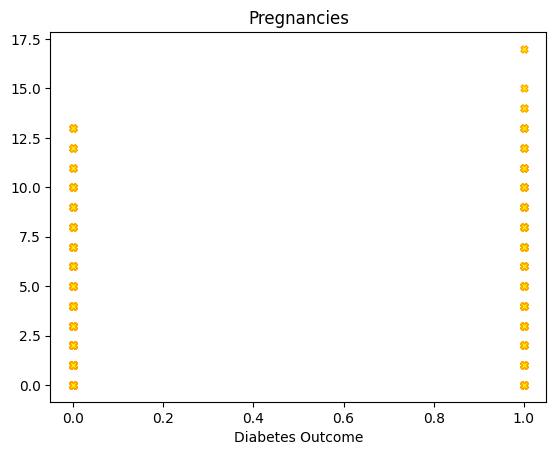

In [12]:
from sklearn.datasets import make_gaussian_quantiles
X1, y1 = make_gaussian_quantiles(n_features=2, 
                                 n_classes=2, 
                                 random_state=12)

plt.scatter(df['Outcome'],df['Pregnancies'], marker='X', color='yellow', s=25, edgecolor='orange');
plt.title("Pregnancies")
plt.xlabel("Diabetes Outcome")

Text(0.5, 0, 'Diabetes Outcome')

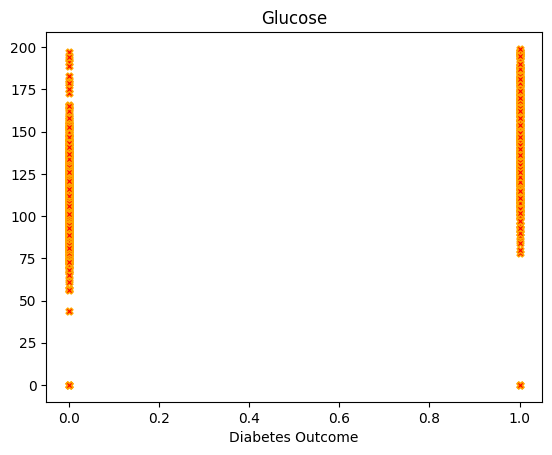

In [13]:
from sklearn.datasets import make_gaussian_quantiles
X1, y1 = make_gaussian_quantiles(n_features=2, 
                                 n_classes=2, 
                                 random_state=12)

plt.scatter(df['Outcome'],df['Glucose'], marker='X', color='red', s=25, edgecolor='orange');
plt.title("Glucose")
plt.xlabel("Diabetes Outcome")

Text(0.5, 0, 'Diabetes Outcome')

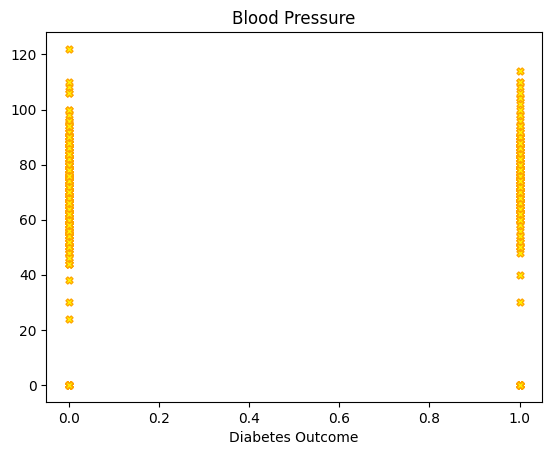

In [14]:
from sklearn.datasets import make_gaussian_quantiles
X1, y1 = make_gaussian_quantiles(n_features=2, 
                                 n_classes=2, 
                                 random_state=12)

plt.scatter(df['Outcome'],df['BloodPressure'], marker='X', color='yellow', s=25, edgecolor='orange');
plt.title("Blood Pressure")
plt.xlabel("Diabetes Outcome")

Text(0.5, 0, 'Diabetes Outcome')

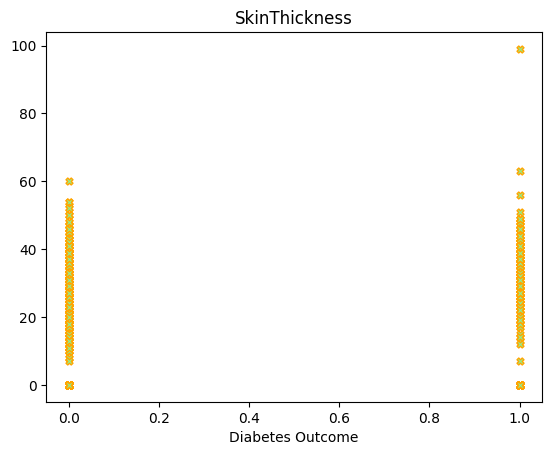

In [15]:
from sklearn.datasets import make_gaussian_quantiles
X1, y1 = make_gaussian_quantiles(n_features=2, 
                                 n_classes=2, 
                                 random_state=12)

plt.scatter(df['Outcome'],df['SkinThickness'], marker='X', color='lightgreen', s=25, edgecolor='orange');
plt.title("SkinThickness")
plt.xlabel("Diabetes Outcome")

Text(0.5, 0, 'Diabetes Outcome')

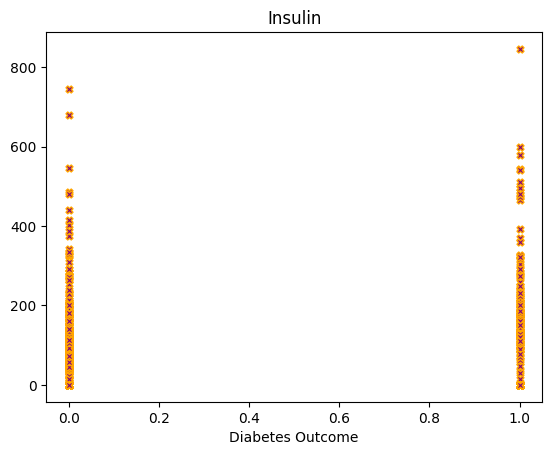

In [16]:
from sklearn.datasets import make_gaussian_quantiles
X1, y1 = make_gaussian_quantiles(n_features=2, 
                                 n_classes=2, 
                                 random_state=12)

plt.scatter(df['Outcome'],df['Insulin'], marker='X', color='purple', s=25, edgecolor='orange');
plt.title("Insulin")
plt.xlabel("Diabetes Outcome")

Text(0.5, 0, 'Diabetes Outcome')

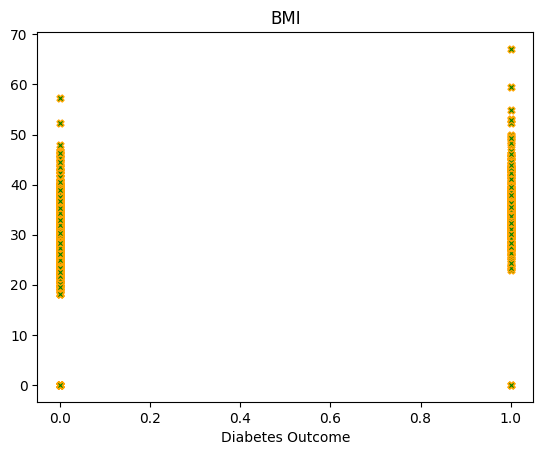

In [17]:
from sklearn.datasets import make_gaussian_quantiles
X1, y1 = make_gaussian_quantiles(n_features=2, 
                                 n_classes=2, 
                                 random_state=12)

plt.scatter(df['Outcome'],df['BMI'], marker='X', color='green', s=25, edgecolor='orange');
plt.title("BMI")
plt.xlabel("Diabetes Outcome")

Text(0.5, 0, 'Diabetes Outcome')

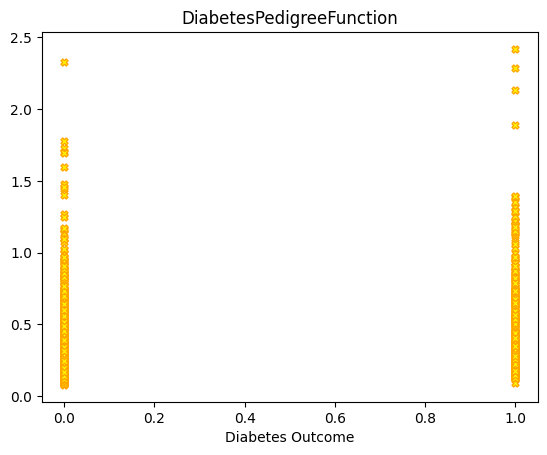

In [18]:
from sklearn.datasets import make_gaussian_quantiles
X1, y1 = make_gaussian_quantiles(n_features=2, 
                                 n_classes=2, 
                                 random_state=12)

plt.scatter(df['Outcome'],df['DiabetesPedigreeFunction'], marker='X', color='yellow', s=25, edgecolor='orange');
plt.title("DiabetesPedigreeFunction")
plt.xlabel("Diabetes Outcome")

Text(0.5, 0, 'Diabetes Outcome')

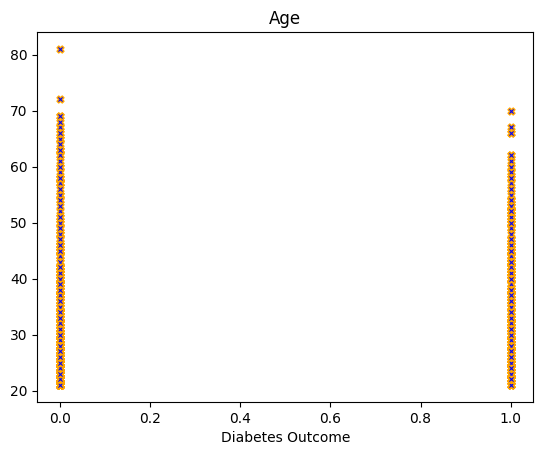

In [19]:
from sklearn.datasets import make_gaussian_quantiles
X1, y1 = make_gaussian_quantiles(n_features=2, 
                                 n_classes=2, 
                                 random_state=12)

plt.scatter(df['Outcome'],df['Age'], marker='X', color='blue', s=25, edgecolor='orange');
plt.title("Age")
plt.xlabel("Diabetes Outcome")

In [23]:
sc1 = GaussianMixture(n_components=3, covariance_type='full')
y_pred1 = sc1.fit_predict(Xnorm)
print("number of estimated clusters : %d" % len(set(y_pred1)))

Clustered1 = Xnorm.copy()
Clustered1 = pd.DataFrame(Clustered1)
Clustered1.loc[:,'Cluster'] = y_pred1 # append labels to points
#Clustered.sample(5)

frames1 = [df['Outcome'], Clustered1['Cluster']]
result1 = pd.concat(frames, axis = 1)
#print(result.shape)
#result.sample(5)
for ClusterNum1 in range(3):

    OneCluster1 = pd.DataFrame(result[result1['Cluster'] == ClusterNum1].groupby('Outcome').size())
    OneCluster1.columns=['Size']
    
    NewDigit1 = OneCluster1.index[OneCluster1['Size'] == OneCluster1['Size'].max()].tolist()
    NewDigit1[0]

    rowIndex1 = result1.index[result1['Cluster'] == ClusterNum1]
    result1.loc[rowIndex1, 'TransLabel'] = NewDigit1[0]
    
    print(ClusterNum1, NewDigit1[0])

number of estimated clusters : 3
0 0
1 1
2 0


In [24]:

print('Gaussian mixture clustering algorithm')
print('-'*60)

Correct1 = (df['Outcome'] == result1['TransLabel']).sum()
Accuracy1 = round(Correct1/df.shape[0],3)
print('Accuracy ', Accuracy1)

Gaussian mixture clustering algorithm
------------------------------------------------------------
Accuracy  0.667


In [25]:
for ClusterNum in range(3):

    OneCluster = pd.DataFrame(result[result['Cluster'] == ClusterNum].groupby('Outcome').size())
    OneCluster.columns=['Size']
    
    NewDigit = OneCluster.index[OneCluster['Size'] == OneCluster['Size'].max()].tolist()
    NewDigit[0]

    rowIndex = result.index[result['Cluster'] == ClusterNum]
    result.loc[rowIndex, 'TransLabel'] = NewDigit[0]
    
    print(ClusterNum, NewDigit[0])

0 0
1 1
2 0


In [26]:
print('K-Means algorithm')
print('-'*60)

Correct = (df['Outcome'] == result['TransLabel']).sum()
Accuracy = round(Correct/df.shape[0],3)
print('Accuracy ', Accuracy)

K-Means algorithm
------------------------------------------------------------
Accuracy  0.667


In [27]:
print('*************************************************\n')
print('Comparison of Accuracy of clustering Algorithms\n')
print('*************************************************')

print('\nGaussian mixture clustering algorithm\t', Accuracy1)
print('\nK-Means algorithm \t\t\t', Accuracy)

*************************************************

Comparison of Accuracy of clustering Algorithms

*************************************************

Gaussian mixture clustering algorithm	 0.667

K-Means algorithm 			 0.667
